In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts 
import os
import numpy as np
import pandas as pd
from scipy.stats import linregress


In [2]:
path = "current.csv"
df = pd.read_csv(path)
df.dtypes

state                      object
positive                    int64
positiveScore             float64
negativeScore             float64
negativeRegularScore      float64
commercialScore           float64
grade                      object
score                     float64
negative                    int64
pending                   float64
hospitalizedCurrently     float64
hospitalizedCumulative    float64
inIcuCurrently            float64
inIcuCumulative           float64
onVentilatorCurrently     float64
onVentilatorCumulative    float64
recovered                 float64
lastUpdateEt               object
checkTimeEt                object
death                     float64
hospitalized              float64
total                       int64
totalTestResults            int64
posNeg                      int64
fips                        int64
dateModified               object
dateChecked                object
notes                      object
hash                       object
dtype: object

In [3]:
df.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,...,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash
0,AK,285,1.0,1.0,1.0,1.0,A,4.0,8063,NaN,...,9.0,32.0,8348,8348,8348,2,2020-04-14T18:15:00Z,2020-04-14T19:08:00Z,"Please stop using the ""total"" field. Use ""tota...",6164f73886cfabe73c7c9fad56709e2b57f5c334
1,AL,3876,1.0,1.0,0.0,1.0,B,3.0,29241,NaN,...,110.0,493.0,33117,33117,33117,1,2020-04-14T04:00:00Z,2020-04-14T20:20:00Z,"Please stop using the ""total"" field. Use ""tota...",d517ca37c599d5eebf0a0d326dafe5e4ba6bbce2
2,AR,1480,1.0,1.0,1.0,1.0,A,4.0,19651,NaN,...,30.0,130.0,21131,21131,21131,5,2020-04-14T18:46:00Z,2020-04-14T19:12:00Z,"Please stop using the ""total"" field. Use ""tota...",3a7c804cd01d3eaad04b7b28774f955dd2129c69
3,AZ,3806,1.0,1.0,0.0,1.0,B,3.0,40290,NaN,...,131.0,NaN,44096,44096,44096,4,2020-04-14T04:00:00Z,2020-04-14T19:23:00Z,"Please stop using the ""total"" field. Use ""tota...",095e72e11a4a87ffa7c0f77468bc4b449accb00d
4,CA,23338,1.0,1.0,0.0,1.0,B,3.0,178870,13200.0,...,758.0,NaN,215408,202208,202208,6,2020-04-13T04:00:00Z,2020-04-14T21:25:00Z,"Please stop using the ""total"" field. Use ""tota...",7a4e124e05f90a9fe7beead00aa1b97925289da6


<b> Determine the percentage of positive cases with respect to the total tests done in each state

In [4]:
df = df[["state", "positive", "negative", "pending", "hospitalized", "death"]]

In [30]:
df["total tests"] = (df["positive"] + df["negative"])/10000

In [31]:
df["percent positive"] = round((df["positive"]/ (df["positive"] + df["negative"]))*100, 2)
df["percent negative"] = 100 - df["percent positive"] 

In [52]:
#Average rate of positive cases in the US
round(df["percent positive"].mean(),2)

12.78

<b> List of States that have a higher rate of positive cases than the rest of the US

In [81]:
higher_infection_rate = df.loc[df["percent positive"] >= 12.78]
higher_infection_rate.reset_index(drop=True, inplace=True)
higher_infection_rate = higher_infection_rate[["state", "percent positive"]]
higher_infection_rate.sort_values(by="percent positive", ascending=False)

,state,percent positive
11,NJ,49.24
12,NY,40.51
18,MP,32.50
10,MI,31.31
1,CT,30.52
4,GA,23.02
8,MA,22.25
5,IL,21.02
0,CO,19.85
13,PA,18.97


Text(0, 0.5, 'Total tests (x10,000)')

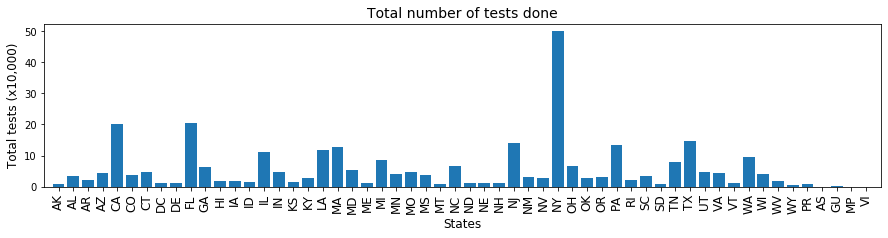

In [50]:
plt.figure(figsize=(15,3))
plt.tight_layout()


x_axis_1 = np.arange(len(df["state"]))
tick_locations = [value for value in x_axis_1]
plt.xticks(tick_locations, df["state"], rotation=90)

y_axis_1 = df["total tests"]
plt.bar(x_axis_1, y_axis_1, color="C0", align="center")
plt.xticks(rotation=90, fontsize=12)

plt.xlim([-1, x_axis_1.size])


# Formatting
plt.title("Total number of tests done", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Total tests (x10,000)", fontsize=12)

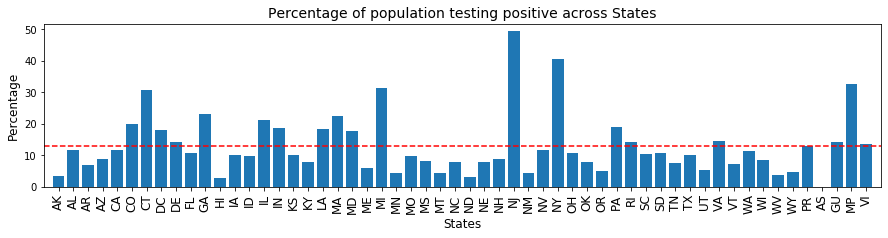

In [58]:
plt.figure(figsize=(15,3))
plt.tight_layout()
x_axis = np.arange(len(df["state"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, df["state"], rotation=90)

y_axis = df["percent positive"]
plt.bar(x_axis, y_axis, color="C0", align="center")
plt.xticks(rotation=90, fontsize=12)

plt.xlim([-1, x_axis.size])


# Formatting
plt.title("Percentage of population testing positive across States", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

plt.hlines(12.78, -1, 60, color="r", linestyles="dashed")

#plt.savefig("Percent positive.png", dpi=300)


<b> Conclusion: Some states like NJ and NY have a high percentage of positive cases
    Inference: Either these states are offering testing only when the individual shows more symptoms or there is a higher rate of infection in these areas

<Figure size 432x288 with 0 Axes>

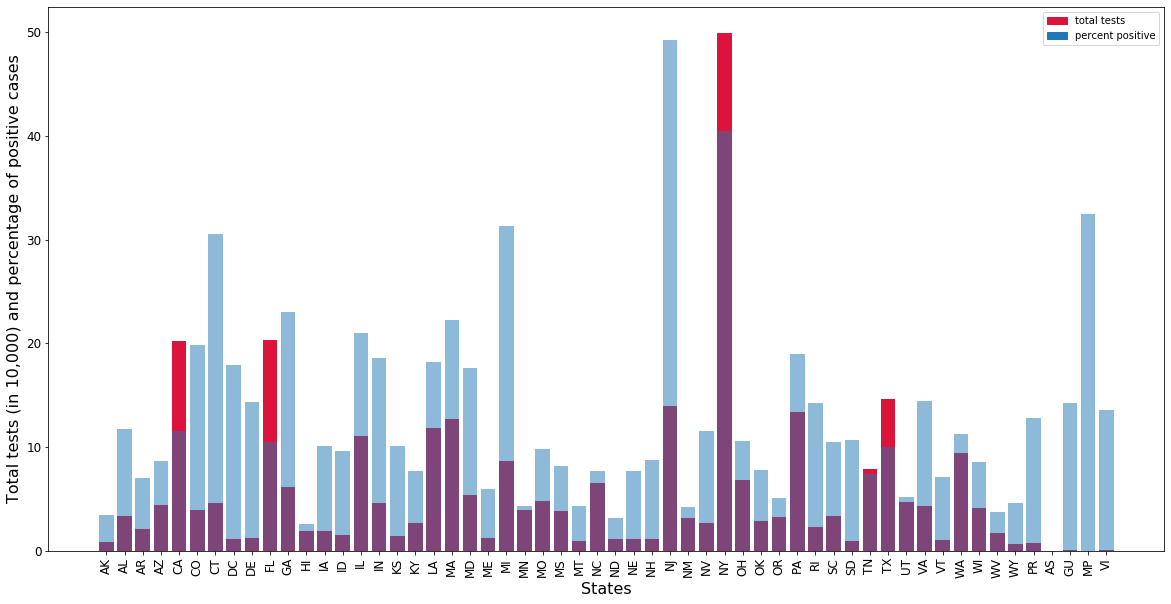

In [48]:
#Bar Graph
plt.tight_layout()
plt.figure(figsize=(20,10))

x_axis_1 = df["state"]
y_axis_1 = df["total tests"]
y_axis_2 = df["percent positive"]

plt.ylabel("Total tests (in 10,000) and percentage of positive cases", fontsize=16)
plt.xlabel("States", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.bar(x_axis_1, y_axis_1, color="crimson", align="center")
plt.bar(x_axis_1, y_axis_2, color="C0", align="center", alpha=0.5)



colors = {'total tests':'crimson', 'percent positive':'C0'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)



# plt.savefig("6 month projection of infection, hospitalization and ICU care_Chicago, Manhattan vs US.png", dpi=300)
# plt.show()

The r-squared is: 0.268


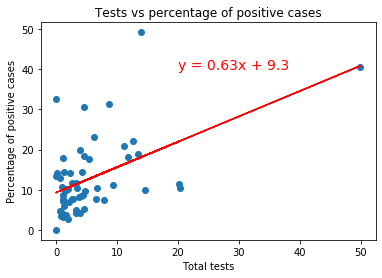

In [106]:
#Plotting
plt.scatter(df["total tests"], df["percent positive"])


plt.title("Tests vs percentage of positive cases")
plt.xlabel("Total tests")
plt.ylabel("Percentage of positive cases")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(df["total tests"], df["percent positive"])
regress_values = df["total tests"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(df["total tests"],regress_values,"r-")
plt.annotate(line_eq,(20,40), fontsize=14, color="red")

# correlation = st.pearsonr(df["total tests"], df["percetage of positive cases"])
print(f"The r-squared is: {round(rvalue**2, 3)}")

In [20]:
strict_testing = df.nlargest(10, 'percent positive')
strict_testing

,state,positive,negative,pending,hospitalized,death,total tests,percent positive,percent negative
31,NJ,68824,70950,NaN,NaN,2805.0,139774,49.24,50.76
34,NY,202208,296935,NaN,46201.0,10834.0,499143,40.51,59.49
54,MP,13,27,7.0,NaN,2.0,40,32.50,67.50
22,MI,27001,59225,NaN,NaN,1768.0,86226,31.31,68.69
6,CT,13989,31852,NaN,NaN,671.0,45841,30.52,69.48
10,GA,14223,47572,NaN,2769.0,501.0,61795,23.02,76.98
19,MA,28163,98388,NaN,2340.0,957.0,126551,22.25,77.75
14,IL,23247,87369,NaN,NaN,868.0,110616,21.02,78.98
5,CO,7691,31051,NaN,1493.0,308.0,38742,19.85,80.15
38,PA,25345,108286,NaN,NaN,584.0,133631,18.97,81.03


In [19]:
relaxed_testing = df.nlargest(10,'percent negative')
relaxed_testing

,state,positive,negative,pending,hospitalized,death,total tests,percent positive,percent negative
52,AS,0,3,17.0,NaN,NaN,3,0.00,100.00
11,HI,504,18916,NaN,44.0,9.0,19420,2.60,97.40
28,ND,341,10575,NaN,42.0,9.0,10916,3.12,96.88
0,AK,285,8063,NaN,32.0,9.0,8348,3.41,96.59
49,WV,640,16398,NaN,164.0,9.0,17038,3.76,96.24
32,NM,1345,30625,NaN,181.0,31.0,31970,4.21,95.79
23,MN,1695,37546,NaN,405.0,79.0,39241,4.32,95.68
26,MT,399,8835,NaN,50.0,7.0,9234,4.32,95.68
50,WY,275,5689,NaN,43.0,1.0,5964,4.61,95.39
37,OR,1633,30730,NaN,381.0,55.0,32363,5.05,94.95


Text(0, 0.5, 'Percentage')

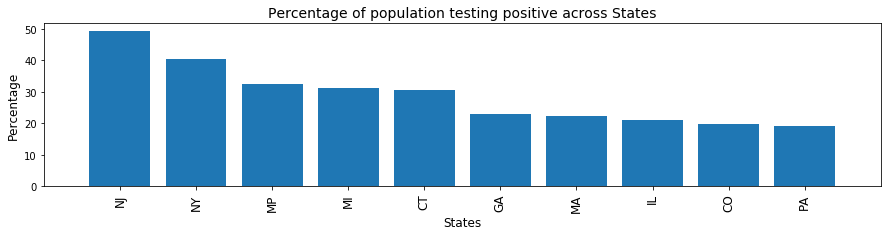

In [27]:
plt.figure(figsize=(15,3))
plt.tight_layout()


x_axis_1 = np.arange(len(strict_testing["state"]))
tick_locations = [value for value in x_axis_1]
plt.xticks(tick_locations, strict_testing["state"], rotation=90)

y_axis_1 = strict_testing["percent positive"]
plt.bar(x_axis_1, y_axis_1, color="C0", align="center")
plt.xticks(rotation=90, fontsize=12)

plt.xlim([-1, x_axis_1.size])


# Formatting
plt.title("Percentage of population testing positive across States", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Percentage", fontsize=12)


<b> Determine which states are more relaxed on testing criteria

<b> Which states are testing aggresively?

Text(0, 0.5, 'Percentage')

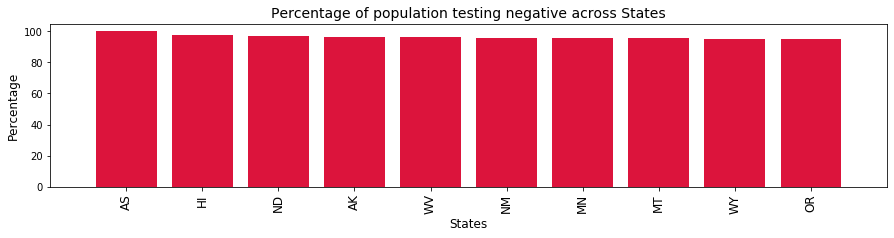

In [26]:
plt.figure(figsize=(15,3))
plt.tight_layout()

x_axis_2 = np.arange(len(relaxed_testing["state"]))
tick_locations = [value for value in x_axis_2]
plt.xticks(tick_locations, relaxed_testing["state"], rotation=90)

y_axis_2 = relaxed_testing["percent negative"]
plt.bar(x_axis_2, y_axis_2, color="crimson", align="center")
plt.xticks(rotation=90, fontsize=12)

plt.xlim([-1, x_axis_1.size])


# Formatting
plt.title("Percentage of population testing negative across States", fontsize=14)
plt.xlabel("States", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
